In [1]:
import pandas as pd
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/csv/DataFrame_pour_modeles_Lou.csv')

In [3]:
df.head()

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098


In [4]:
df.columns

Index(['ID', 'Date', 'PolicyFamily', 'PolicyType', 'value', 'Cases',
       'Cases_New', 'Type', 'Source', 'J-56', 'J-42', 'J-35', 'J-28', 'J-21',
       'J-14', 'J-7', 'J0', 'J7', 'J14', 'J21', 'J28', 'J35', 'J42', 'J49',
       'J56', 'd_j-7', 'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff'],
      dtype='object')

In [5]:
df['D28'] = df['J28'] -  df['J0']
df['D21'] = df['J21'] -  df['J0']
df['D14'] =  df['J14'] -  df['J0']
df['D-14'] = df['J0'] -  df['J-14']
df['D-21'] = df['J0'] -  df['J-21']
df['D-28'] = df['J0'] -  df['J-28']

# Let's start with dataviz

<AxesSubplot:xlabel='D-14', ylabel='D14'>

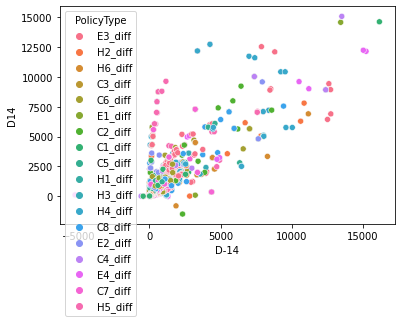

In [6]:
sns.scatterplot(x=df['D-14'],y=df['D14'],hue=df['PolicyType'])

# Model: Linear Regression D-14 -> D14


## Let's check feature importance

In [7]:
df1 = df.copy()

In [8]:
df_model_1 = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [9]:
df_model_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
scaler = MinMaxScaler()
df_model_1['D-14'] = scaler.fit_transform(df_model_1[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
X = df_model_1.drop(columns='D14')
y = df_model_1['D14']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6436696849032073

In [14]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,20076.885326
H5_diff,556.729646
E4_diff,368.708199
C6_diff,323.588380
E1_diff,317.488702
C2_diff,191.566056
C8_diff,120.849636
E2_diff,97.731470
C3_diff,97.448146
C7_diff,83.835015


## Let's delete unrelevant 

In [15]:
# H5 : Vaccines
# E4_International support
# E2 Income support
# E1: Income support

## Most important feature 14D

In [160]:
df_model_2 = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'C4_diff','C7_diff']]

In [161]:
df_model_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_2.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
X = df_model_2.drop(columns=['D14'])
y = df_model_2['D14']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [164]:
model_2=LinearRegression()
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.644150948149506

In [165]:
coeff_df = pd.DataFrame(model_2.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
C6_diff,321.715728
C2_diff,189.519250
C8_diff,118.264397
C3_diff,94.758762
C7_diff,82.817851
C1_diff,59.866621
C5_diff,58.933387
C4_diff,42.879848
D-14,0.937719
H6_diff,-93.267283


# Ridge

## D-14 -> D14

In [166]:
df1 = df.copy()

In [167]:
df_ridge = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'C4_diff','C7_diff']]

In [168]:
df_ridge.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ridge.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [169]:
scaler = MinMaxScaler()
df_ridge['D-14'] = scaler.fit_transform(df_ridge[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [170]:
X = df_ridge.drop(columns='D14')
y = df_ridge['D14']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [172]:
from sklearn.linear_model import Ridge
from scipy.stats import uniform as sp_rand

param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
ridge = Ridge()
rsearch = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c9b5ed0>})
0.7115774762234162
0.2021136628232566


In [173]:
best_ridge = Ridge(alpha=rsearch.best_estimator_.alpha)
best_ridge.fit(X_train,y_train)

Ridge(alpha=0.2021136628232566)

In [174]:
best_ridge.score(X_test,y_test)

0.646405812114419

In [175]:
coeff_df_best_ridge = pd.DataFrame(best_ridge.coef_, X.columns, columns=['Coefficient'])
coeff_df_best_ridge.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,19688.393735
C6_diff,315.771950
C2_diff,182.974356
C8_diff,108.039566
C3_diff,89.871276
C7_diff,79.194103
C5_diff,54.962208
C1_diff,52.029353
C4_diff,39.006102
H6_diff,-96.843896


## Ridge without D-14

In [176]:
df_ridge = df1[['D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'C4_diff','C7_diff']]

In [177]:
df_ridge.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ridge.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [178]:
X = df_ridge.drop(columns='D14')
y = df_ridge['D14']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [180]:
from sklearn.linear_model import Ridge
from scipy.stats import uniform as sp_rand

param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
ridge = Ridge()
rsearch = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d748290>})
0.006067838107966139
0.9923342720590564


In [181]:
best_ridge_2 = Ridge(alpha=rsearch.best_estimator_.alpha)
best_ridge_2.fit(X_train,y_train)

Ridge(alpha=0.9923342720590564)

In [182]:
best_ridge_2.score(X_test,y_test)

0.011229886080561302

In [183]:
coeff_df_best_ridge_2 = pd.DataFrame(best_ridge_2.coef_, X.columns, columns=['Coefficient'])
coeff_df_best_ridge_2.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
C7_diff,33.355704
C5_diff,-57.590967
C4_diff,-82.185963
C3_diff,-141.264600
C6_diff,-196.097422
C2_diff,-205.841207
C1_diff,-249.966026
E3_diff,-291.978571
H6_diff,-307.860760
H3_diff,-451.894623


# XGboost


In [184]:
df1 = df.copy()

In [185]:
df_xgb = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'C4_diff','C7_diff']]

In [186]:
df_xgb.replace([np.inf, -np.inf], np.nan, inplace=True)
df_xgb.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [187]:
scaler = MinMaxScaler()
df_xgb['D-14'] = scaler.fit_transform(df_xgb[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [188]:
X = df_xgb.drop(columns='D14')
y = df_xgb['D14']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [190]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(X_train, y_train)

xgb_r.score(X_test, y_test)

0.7043476654505187

In [191]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 562.297512


/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D14', ylabel='Density'>

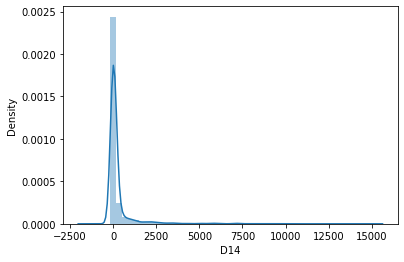

In [192]:
sns.distplot(y)

In [193]:
temp = pd.concat([pd.Series(y_test).reset_index(drop=True),pd.Series(pred).reset_index(drop=True)], axis=1)

In [194]:
temp.columns = ['test','pred']

In [195]:
temp.head()

,test,pred
0,323.0,417.111603
1,23.0,61.148560
2,80.0,101.686958
3,0.0,2.731282
4,33.0,51.612377


In [196]:
temp2 = temp[temp['test']!=0]

In [197]:
print(temp.shape)
print(temp2.shape)

(2316, 2)
(1885, 2)


In [198]:
import math

In [199]:
math.sqrt(np.mean((temp2.test - temp2.pred)**2))

623.2619200727872

# RandomForestRegressor

## with D-14

In [220]:
df1 = df.copy()

In [221]:
df_rf = df1[['D14', 'D-14' ,'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'C4_diff','C7_diff']]

In [222]:
df_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
df_rf.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [223]:
X = df_rf.drop(columns='D14')
y = df_rf['D14']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [225]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100)

RF.fit(X_train,y_train)

RF.score(X_test,y_test)

0.6523029384110275

## without D-14

In [215]:
df_rf = df1[['D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'C4_diff','C7_diff']]

In [216]:
df_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
df_rf.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [217]:
X = df_rf.drop(columns='D14')
y = df_rf['D14']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [219]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100)

RF.fit(X_train,y_train)

RF.score(X_test,y_test)

-0.07772113038766526

# Neural Network

In [ ]:
df1 = df.copy()

In [ ]:
df_nn = df1[['D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [ ]:
df_nn.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nn.dropna(inplace = True)

In [ ]:
X = df_nn.drop(columns='D14')
y = df_nn['D14']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
def initialize_model():

    ### Model architecture
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=18))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation="linear"))
    
    
    # Model optimization : Optimized, loss and metric to 
    model.compile(optimizer='adam',
                  loss='mse',       # MSE stands for Mean Square Error
                  metrics=['mae'])  # MAE stands for Mean Absolute Error
    
    return model


model = initialize_model()

In [ ]:
model.summary()

In [ ]:
def plot_loss_mae(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    

In [ ]:
model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    batch_size=16,
                    verbose=0)

plot_loss_mae(history)